### Importing Data from the Open ML Dataset

In [1]:
# Import libraries
import openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Getting the data from 42225

Dataset Shape: (53940, 10)
   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335


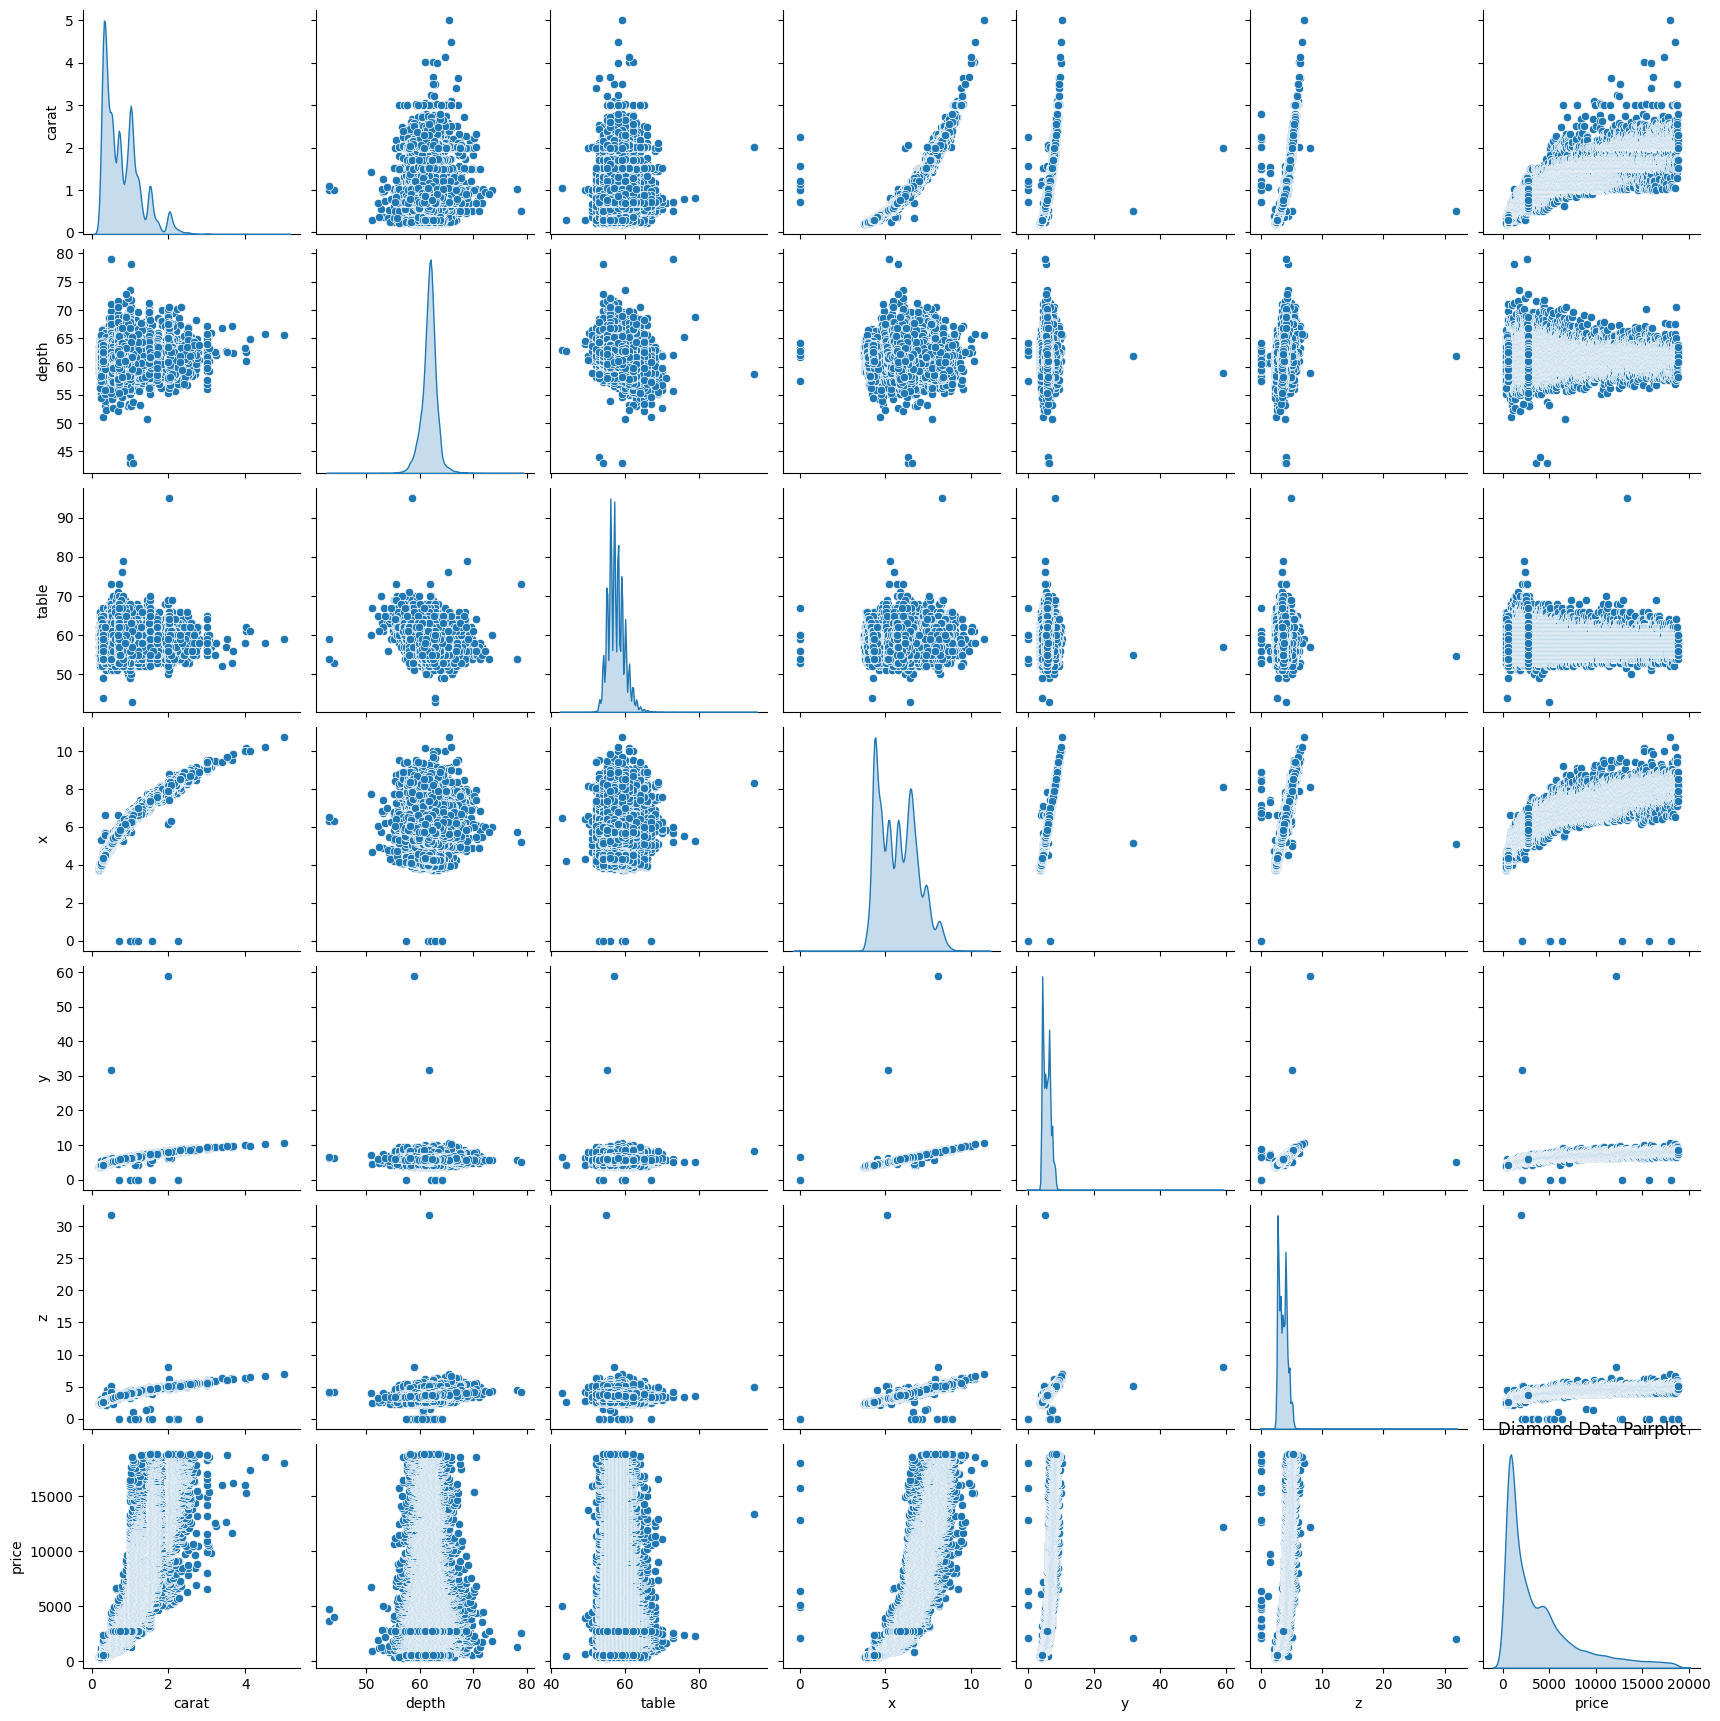

In [2]:

# Load the diamond dataset from OpenML
dataset = openml.datasets.get_dataset(42225)  # Diamond dataset ID on OpenML
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Explore the dataset
df = pd.concat([X, y], axis=1)
print("Dataset Shape:", df.shape)
print(df.head())

# Basic visualization
sns.pairplot(df, diag_kind='kde')
plt.title('Diamond Data Pairplot')
plt.show()

# Save dataset for further analysis
df.to_csv('diamond_data.csv', index=False)


Summarize the dataset to understand distributions and key metrics: Descriptive 

In [3]:
# Statistical summary of numerical features
print(df.describe())

# Check for null values in the dataset
print("Null Values in Dataset:\n", df.isnull().sum())

# Distribution of target variable
print("Target Variable Distribution:\n", y.value_counts())


              carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  


Identify relationships between features: Correlation Analysis

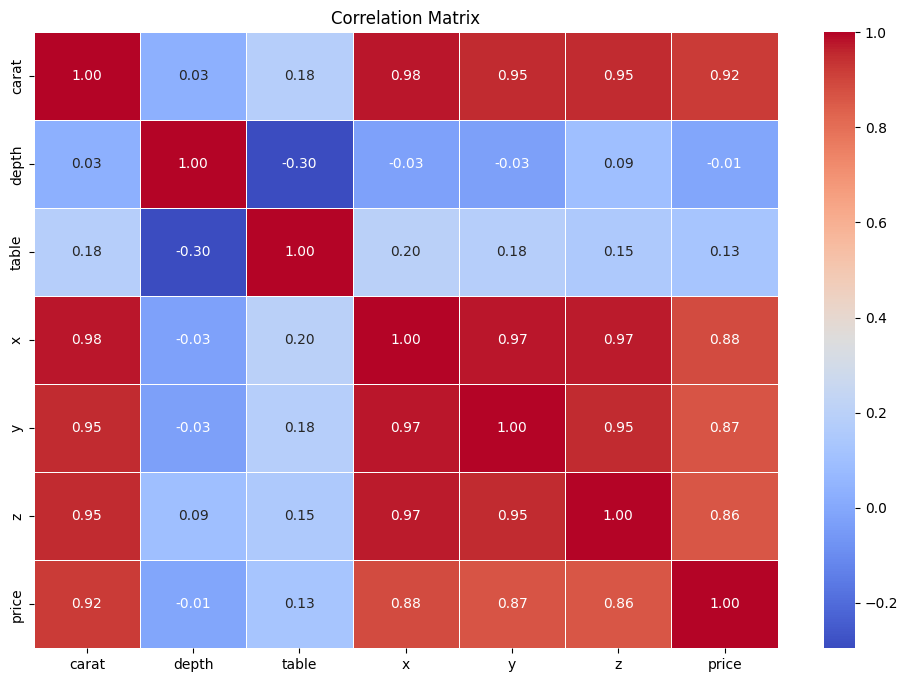

In [5]:
# Correlation matrix excluding categorical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Visualize the distributions to spot patterns or outliers:Distribution of Numerical Features

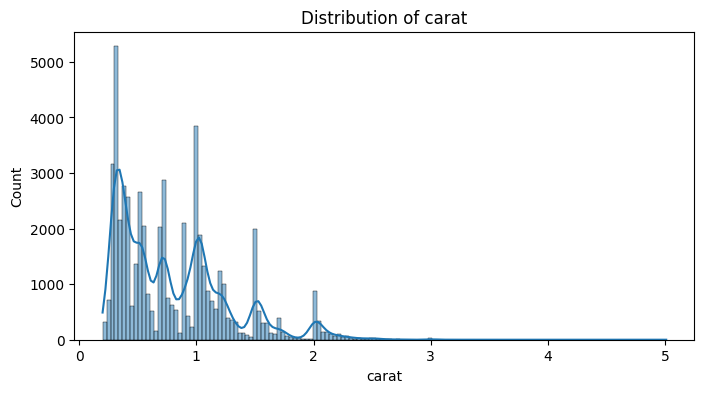

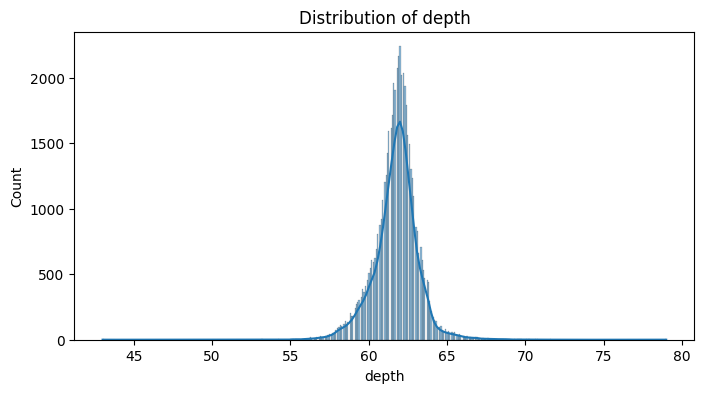

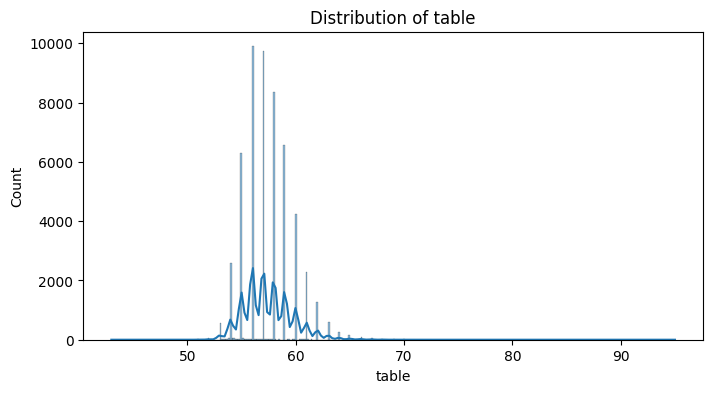

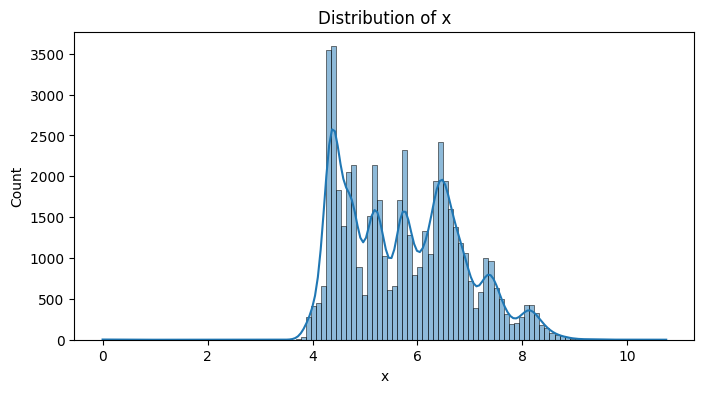

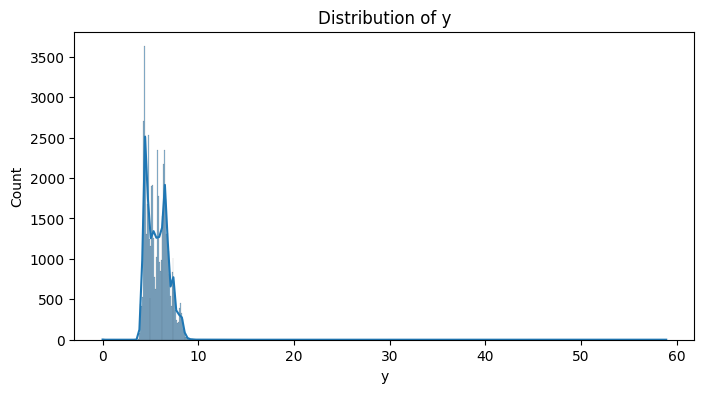

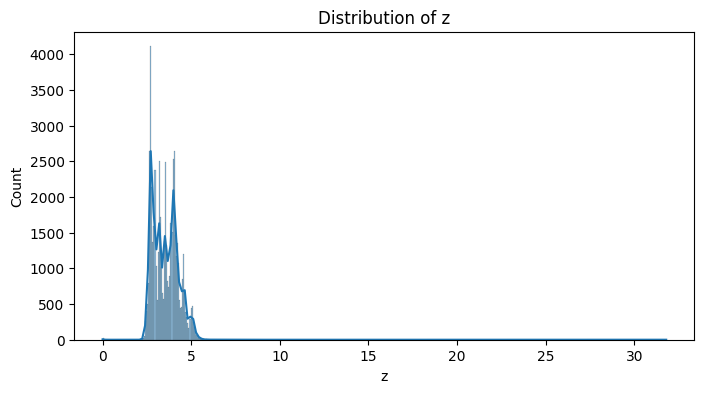

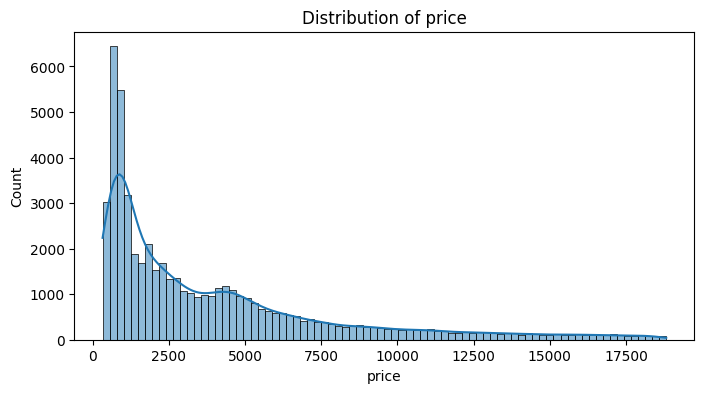

In [6]:
# Distribution of each numerical feature
num_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


Boxplots can help spot outliers in numerical columns:Outlier Detection

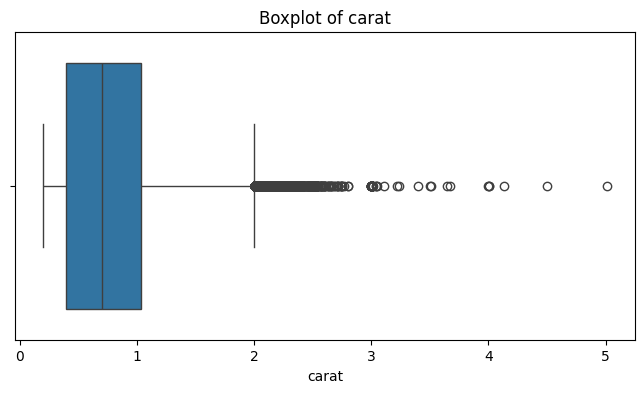

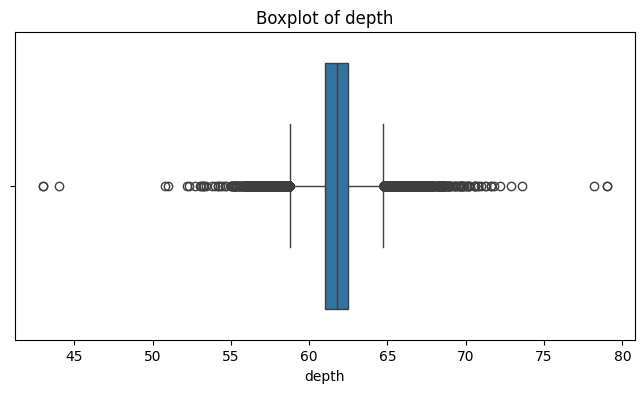

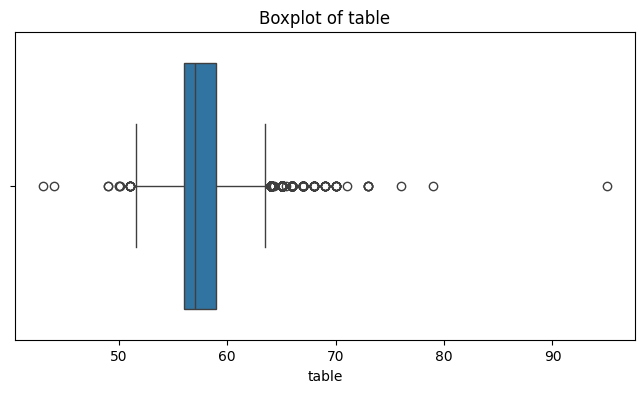

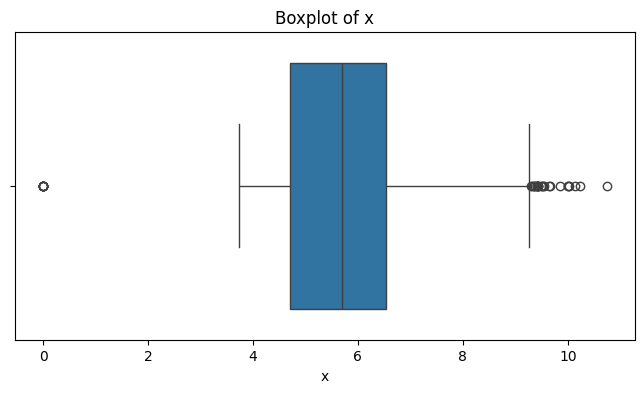

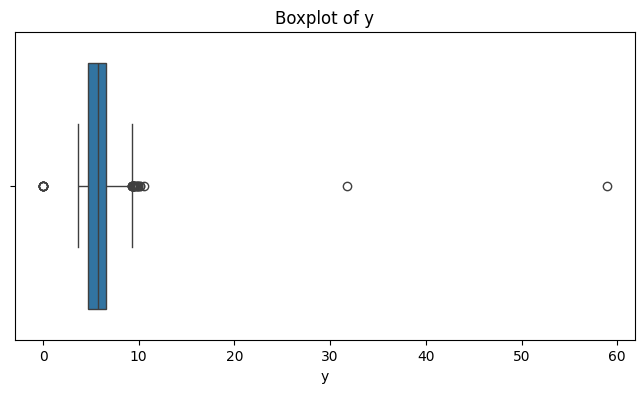

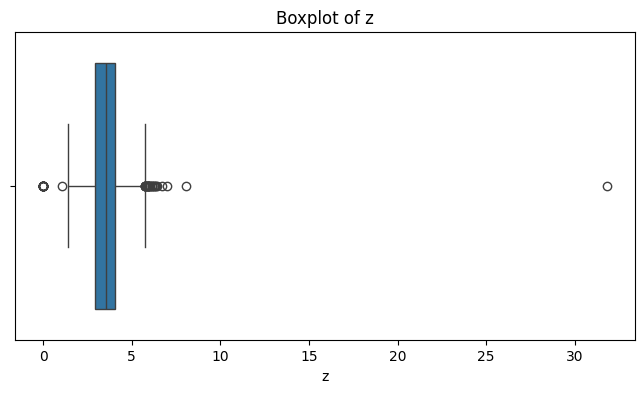

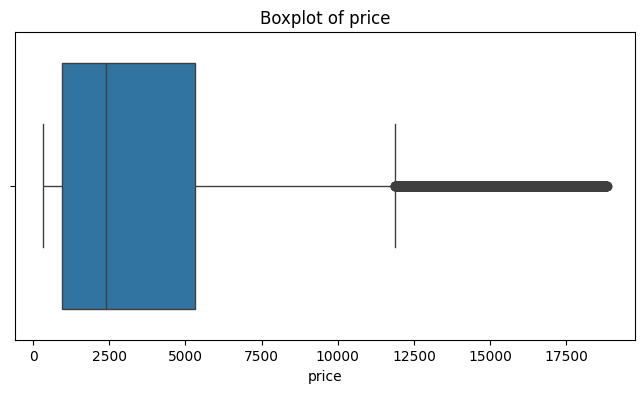

In [8]:
# Boxplots for numerical features
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


Explore the distribution of categorical features: Categorical Feature Analysis

In [10]:
# Distribution of categorical features
cat_features = df.select_dtypes(include=['object']).columns

for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()


Analyze how features relate to the target variable: Target Variable Relationships

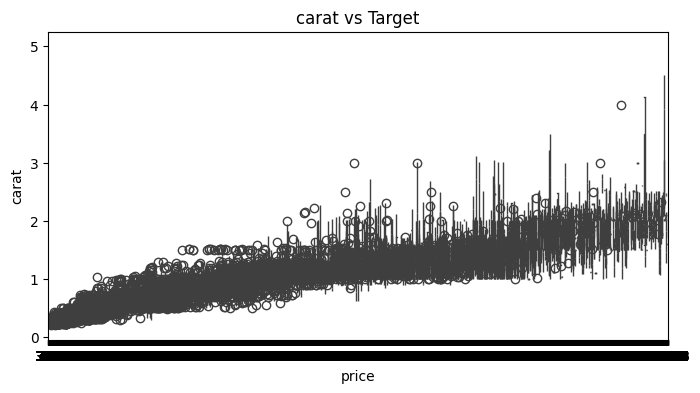

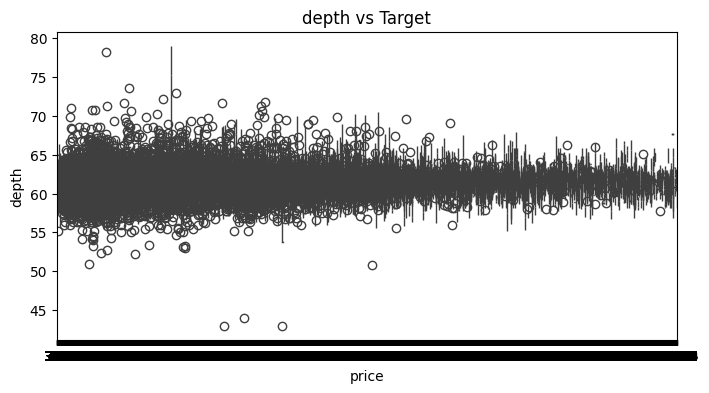

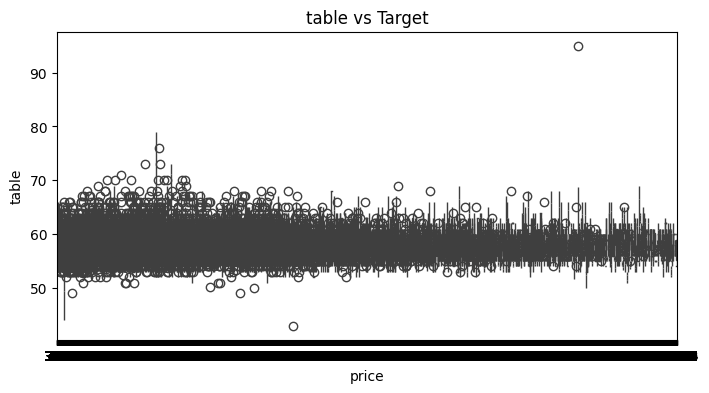

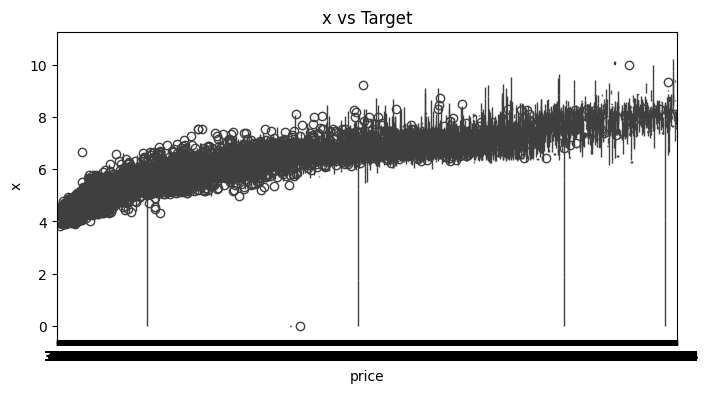

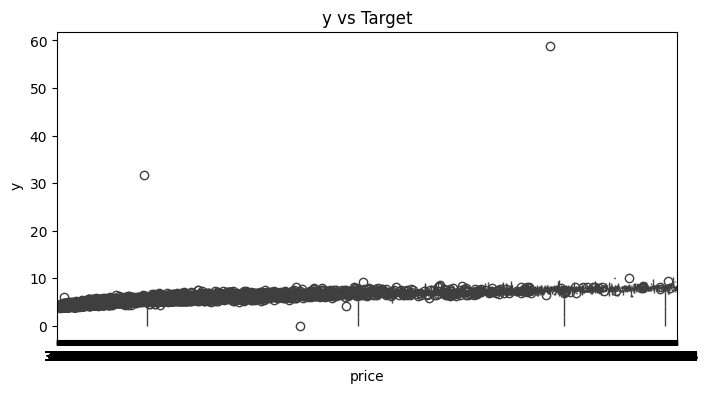

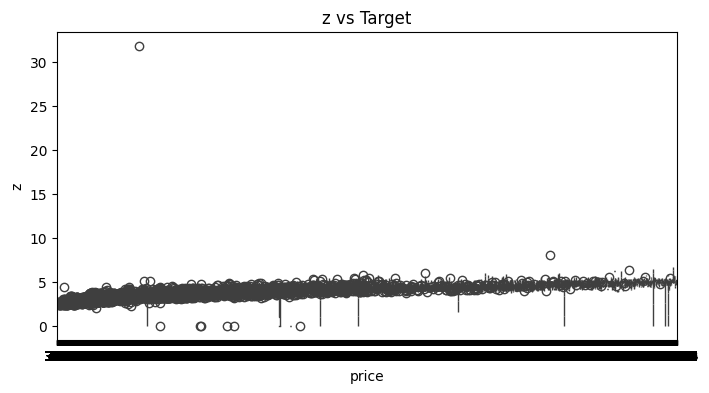

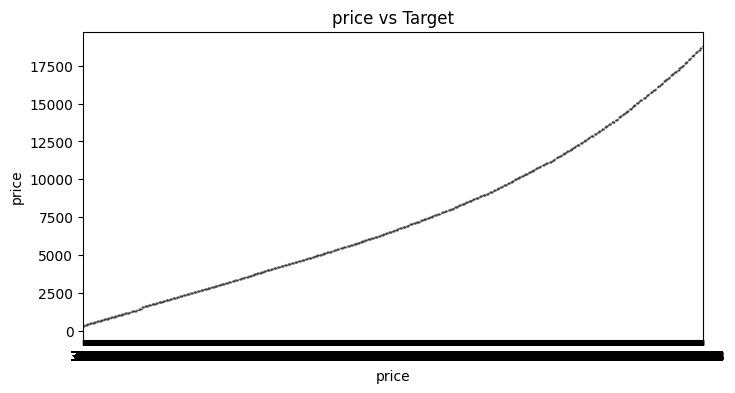

In [11]:
# Boxplot for numerical features by target
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=y, y=df[feature])
    plt.title(f"{feature} vs Target")
    plt.show()

# Categorical features vs target
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feature, y=y, data=df)
    plt.title(f"{feature} vs Target")
    plt.xticks(rotation=45)
    plt.show()


Check for and handle any missing values: Missing Values and Data Cleaning

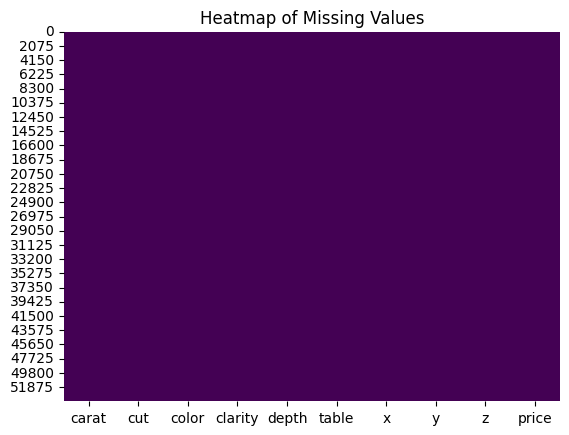

In [12]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

# Handle missing values (if necessary)
#df.fillna(df.median(), inplace=True)  # Example: Fill missing values with median


### Feature Engineering 

Feature Transformation: Apply logarithmic or power transformation for highly skewed features.

Interaction Features: Create new features by combining existing ones (e.g., ratio of carat to price).

#### Print actionable insights based on your EDA:Insights Extraction

In [13]:
# Example insights extraction
print("Most correlated features with price:\n", correlation_matrix['price'].sort_values(ascending=False).head())


Most correlated features with price:
 price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64
